In [648]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow.contrib.keras as kr
from sklearn import preprocessing
import logging
import tensorflow as tf
import pulp
import scipy.stats as stats

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
matplotlib.rcParams.update({'font.size': 14})

In [3]:
energy_data = pd.read_excel('../data/ProblemCData.xlsx', sheetname='seseds')
energy_indicator = pd.read_excel('../data/ProblemCData.xlsx', sheetname='msncodes')

In [4]:
energy_data.head()

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.0
1,ABICB,AZ,1961,0.0
2,ABICB,AZ,1962,0.0
3,ABICB,AZ,1963,0.0
4,ABICB,AZ,1964,0.0


In [5]:
energy_indicator.head()

,MSN,Description,Unit
0,ABICB,Aviation gasoline blending components consumed...,Billion Btu
1,ABICP,Aviation gasoline blending components consumed...,Thousand barrels
2,ARICB,Asphalt and road oil consumed by the industria...,Billion Btu
3,ARICD,Asphalt and road oil price in the industrial s...,Dollars per million Btu
4,ARICP,Asphalt and road oil consumed by the industria...,Thousand barrels


In [85]:
energy_sources = {}
renewable_keywords = ['wind', 'biomass', 'solar', 'hydroelectricity', 'geothermal', 'renewable', ]
for i in energy_indicator.iterrows():
    for j in renewable_keywords:
        if j in i[1]['Description'].lower() and i[1]['MSN'][4] == 'B':
            energy_sources[i[1]['MSN']] = i[1]['Description'] + ' ' + i[1]['Unit']
len(energy_sources), energy_sources

(24,
 {'BMTCB': 'Biomass total consumption Billion Btu',
  'EMFDB': 'Biomass inputs (feedstock) for the production of fuel ethanol. Billion Btu',
  'GECCB': 'Direct use of geothermal energy and heat pumps in the commercial sector. Billion Btu',
  'GEEGB': 'Electricity produced from geothermal energy by the electric power sector. Billion Btu',
  'GEICB': 'Direct use of geothermal energy and heat pumps in the industrial sector. Billion Btu',
  'GERCB': 'Direct use of geothermal energy and heat pumps in the residential sector. Billion Btu',
  'GETCB': 'Geothermal energy total consumption. Billion Btu',
  'GETXB': 'Geothermal total end-use consumption. Billion Btu',
  'GOCCB': 'Geothermal energy and hydroelectricity consumed in the commercial sector. Billion Btu',
  'GORCB': 'Geothermal and solar energy consumed in the residential sector. Billion Btu',
  'HYCCB': 'Hydroelectricity produced in the commercial sector. Billion Btu',
  'HYEGB': 'Hydroelectricity produced by the electric power s

In [121]:
energy_sources = {}
for i in energy_indicator.iterrows():
    if i[1]['MSN'][4] == 'B':
        energy_sources[i[1]['MSN']] = i[1]['Description'] + ' ' + i[1]['Unit']
len(energy_sources), energy_sources

(214,
 {'ABICB': 'Aviation gasoline blending components consumed by the industrial sector. Billion Btu',
  'ARICB': 'Asphalt and road oil consumed by the industrial sector. Billion Btu',
  'ARTCB': 'Asphalt and road oil total consumption. Billion Btu',
  'ARTXB': 'Asphalt and road oil total end-use consumption. Billion Btu',
  'AVACB': 'Aviation gasoline consumed by the transportation sector. Billion Btu',
  'AVTCB': 'Aviation gasoline total consumption. Billion Btu',
  'AVTXB': 'Aviation gasoline total end-use consumption. Billion Btu',
  'BMTCB': 'Biomass total consumption Billion Btu',
  'CCEXB': 'Coal coke exported from the United States.  Billion Btu',
  'CCIMB': 'Coal coke imported into the United States. Billion Btu',
  'CCNIB': 'Coal coke net imports into the United States. Billion Btu',
  'CLACB': 'Coal consumed by the transportation sector. Billion Btu',
  'CLCCB': 'Coal consumed by the commercial sector. Billion Btu',
  'CLEIB': 'Coal consumed by the electric power sector. B

In [380]:
energy_sources = {}
for i in energy_indicator.iterrows():
    if 'price' in i[1]['Description'].lower():
        energy_sources[i[1]['MSN']] = i[1]['Description'] + ' ' + i[1]['Unit']
len(energy_sources), energy_sources

(116,
 {'ARICD': 'Asphalt and road oil price in the industrial sector. Dollars per million Btu',
  'ARTCD': 'Asphalt and road oil average price, all sectors. Dollars per million Btu',
  'ARTXD': 'Asphalt and road oil average price, all end-use sectors. Dollars per million Btu',
  'AVACD': 'Aviation gasoline price in the transportation sector. Dollars per million Btu',
  'AVTCD': 'Aviation gasoline average price, all sectors. Dollars per million Btu',
  'AVTXD': 'Aviation gasoline average price, all end-use sectors. Dollars per million Btu',
  'CCEXD': 'Coal coke exports average price, United States. Dollars per million Btu',
  'CCIMD': 'Coal coke imports average price, United States. Dollars per million Btu',
  'CLACD': 'Coal price in the transportation sector. Dollars per million Btu',
  'CLCCD': 'Coal price in the commercial sector. Dollars per million Btu',
  'CLEID': 'Coal price in the electric power sector. Dollars per million Btu',
  'CLICD': 'Coal price in the industrial sector.

In [148]:
energy_sources = {}
for i in energy_indicator.iterrows():
    if i[1]['MSN'][4] == 'K':
        energy_sources[i[1]['MSN']] = i[1]['Description'] + ' ' + i[1]['Unit']
len(energy_sources), energy_sources

(23,
 {'CLACK': 'Factor for converting coal consumed by the transportation sector from physical units to Btu. Million Btu per short ton',
  'CLEIK': 'Factor for converting coal consumed by the electric power sector from physical units to Btu. Million Btu per short ton',
  'CLHCK': 'Factor for converting coal consumed by the residential and commercial sectors from physical units to Btu. Million Btu per short ton',
  'CLKCK': 'Factor for converting coal carbonized at coke plants from physical units to Btu. Million Btu per short ton',
  'CLOCK': 'Factor for converting coal consumed by industrial users other than coke plants from physical units to Btu. Million Btu per short ton',
  'CLPRK': 'Factor for converting coal production from physical units to Btu. Million Btu per short ton',
  'COPRK': 'Factor for converting crude oil production from physical units to Btu. Million Btu per barrel',
  'ENTCK': 'Factor for converting fuel ethanol consumption from physical units to Btu. Million Btu pe

In [47]:
energy_sources = {}
for i in energy_indicator.iterrows():
    energy_sources[i[1]['MSN'][4]] = i[1]['Description'] + ' ' + i[1]['Unit']
len(energy_sources), energy_sources

(8,
 {'B': 'Electricity produced from wind energy. Billion Btu',
  'D': 'Waxes price in the industrial sector. Dollars per million Btu',
  'K': 'Factor for converting all petroleum products total consumption from physical units to Btu, United States only. Million Btu per barrel',
  'P': 'Electricity produced from wind energy by the electric power sector. Million kilowatthours',
  'R': 'Total energy consumed per dollar of real gross domestic product. Thousand Btu per chained (2000) dollar',
  'S': 'Energy expenditures as share of current-dollar GDP. Percent',
  'V': 'Waxes expenditures in the industrial sector. Million dollars',
  'X': 'Real gross domestic product. Million chained (2005) dollars'})

In [382]:
def draw_energy_trend(state, msn):
    yrs = []
    data = []
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state and record['MSN'] == msn:
            yrs.append(record['Year'])
            data.append(record['Data'])
    plt.plot(yrs, data)
    plt.show()
    return yrs

In [111]:
def draw_renewable_energy_ratio_trend(state):
    yrs = range(1960, 2010)
    renewable_data = [0] * (2009 - 1960 + 1)
    total_data = [0] * (2009 - 1960 + 1)
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state:
            if record['MSN'] == 'RETCB':
                renewable_data[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'TETCB':
                total_data[record['Year'] - 1960] = record['Data']
    plt.plot(yrs, np.divide(renewable_data, total_data))
    plt.show()

In [429]:
def draw_renewable_ratio_bar(state, title):
    yrs = range(1960, 2010)
    renewable_data = [0] * (2009 - 1960 + 1)
    total_data = [0] * (2009 - 1960 + 1)
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state:
            if record['MSN'] == 'RETCB':
                renewable_data[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'TETCB':
                total_data[record['Year'] - 1960] = record['Data']
    plt.figure(figsize=(10, 6))
    plt.bar(yrs, renewable_data, label='Renewable Energy Consumption')
    plt.bar(yrs, total_data, bottom=renewable_data, label='Total Energy Consumption')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    return np.divide(renewable_data, total_data)

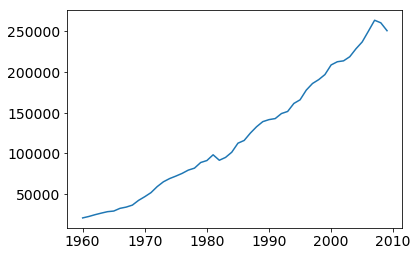

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009]

In [417]:
draw_energy_trend('AZ', 'ESTCB')

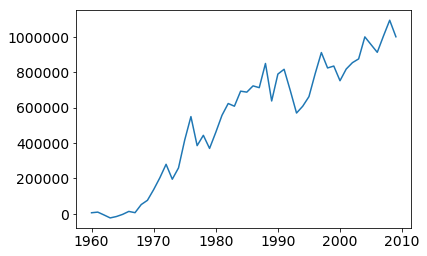

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009]

In [416]:
draw_energy_trend('CA', 'ELISB')

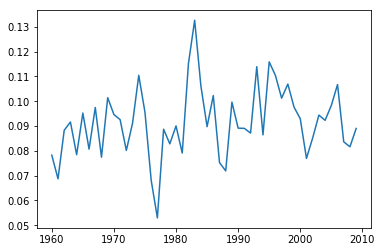

In [154]:
draw_renewable_energy_ratio_trend('CA')

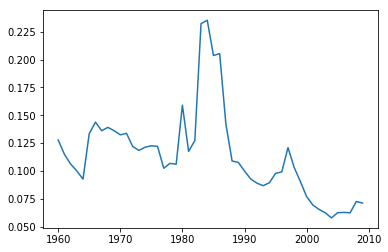

In [170]:
draw_renewable_energy_ratio_trend('AZ')

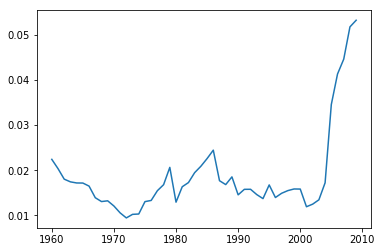

In [171]:
draw_renewable_energy_ratio_trend('NM')

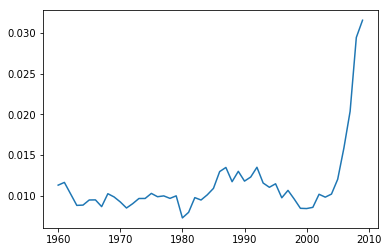

In [172]:
draw_renewable_energy_ratio_trend('TX')

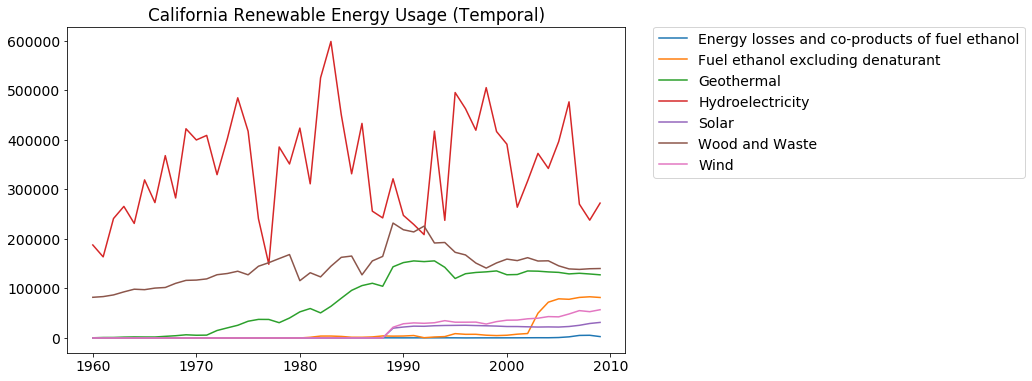

In [621]:
yrs = range(1960, 2010)
emlcb = [0] * 50
emtcb = [0] * 50
getcb = [0] * 50
hytcb = [0] * 50
sotcb = [0] * 50
wwtcb = [0] * 50
wytcb = [0] * 50
for _idx, record in energy_data.iterrows():
    if record['StateCode'] == 'CA':
        if record['MSN'] == 'EMLCB':
            emlcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'EMTCB':
            emtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'GETCB':
            getcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'HYTCB':
            hytcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'SOTCB':
            sotcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WWTCB':
            wwtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WYTCB':
            wytcb[record['Year'] - 1960] = record['Data']
plt.figure(figsize=(10, 6))
plt.plot(yrs, emlcb, label='Energy losses and co-products of fuel ethanol')
plt.plot(yrs, emtcb, label='Fuel ethanol excluding denaturant')
plt.plot(yrs, getcb, label='Geothermal')
plt.plot(yrs, hytcb, label='Hydroelectricity')
plt.plot(yrs, sotcb, label='Solar')
plt.plot(yrs, wwtcb, label='Wood and Waste')
plt.plot(yrs, wytcb, label='Wind')
plt.title('California Renewable Energy Usage (Temporal)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

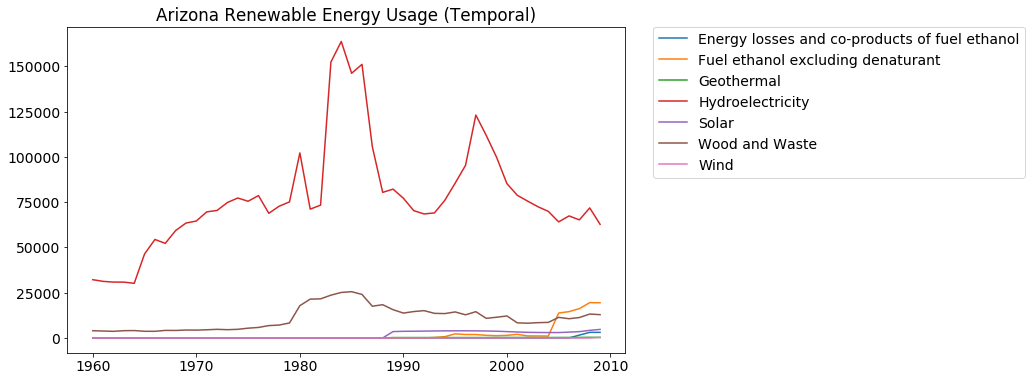

In [624]:
yrs = range(1960, 2010)
emlcb = [0] * 50
emtcb = [0] * 50
getcb = [0] * 50
hytcb = [0] * 50
sotcb = [0] * 50
wwtcb = [0] * 50
wytcb = [0] * 50
for _idx, record in energy_data.iterrows():
    if record['StateCode'] == 'AZ':
        if record['MSN'] == 'EMLCB':
            emlcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'EMTCB':
            emtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'GETCB':
            getcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'HYTCB':
            hytcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'SOTCB':
            sotcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WWTCB':
            wwtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WYTCB':
            wytcb[record['Year'] - 1960] = record['Data']
plt.figure(figsize=(10, 6))
plt.plot(yrs, emlcb, label='Energy losses and co-products of fuel ethanol')
plt.plot(yrs, emtcb, label='Fuel ethanol excluding denaturant')
plt.plot(yrs, getcb, label='Geothermal')
plt.plot(yrs, hytcb, label='Hydroelectricity')
plt.plot(yrs, sotcb, label='Solar')
plt.plot(yrs, wwtcb, label='Wood and Waste')
plt.plot(yrs, wytcb, label='Wind')
plt.title('Arizona Renewable Energy Usage (Temporal)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

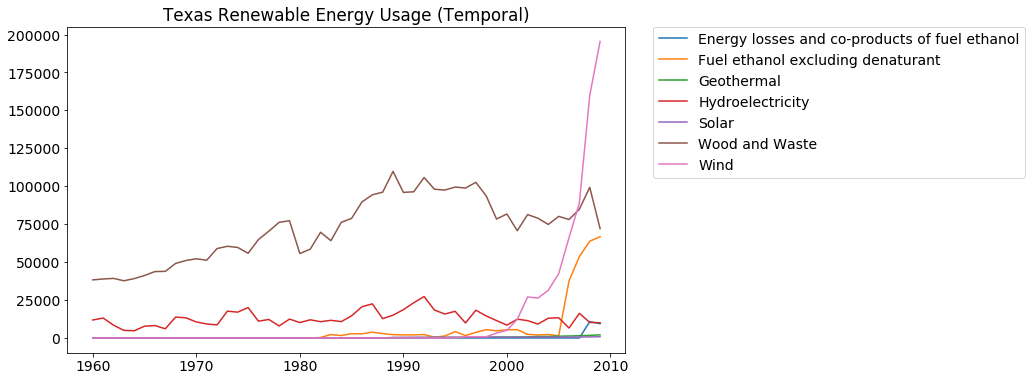

In [627]:
yrs = range(1960, 2010)
emlcb = [0] * 50
emtcb = [0] * 50
getcb = [0] * 50
hytcb = [0] * 50
sotcb = [0] * 50
wwtcb = [0] * 50
wytcb = [0] * 50
for _idx, record in energy_data.iterrows():
    if record['StateCode'] == 'TX':
        if record['MSN'] == 'EMLCB':
            emlcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'EMTCB':
            emtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'GETCB':
            getcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'HYTCB':
            hytcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'SOTCB':
            sotcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WWTCB':
            wwtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WYTCB':
            wytcb[record['Year'] - 1960] = record['Data']
plt.figure(figsize=(10, 6))
plt.plot(yrs, emlcb, label='Energy losses and co-products of fuel ethanol')
plt.plot(yrs, emtcb, label='Fuel ethanol excluding denaturant')
plt.plot(yrs, getcb, label='Geothermal')
plt.plot(yrs, hytcb, label='Hydroelectricity')
plt.plot(yrs, sotcb, label='Solar')
plt.plot(yrs, wwtcb, label='Wood and Waste')
plt.plot(yrs, wytcb, label='Wind')
plt.title('Texas Renewable Energy Usage (Temporal)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

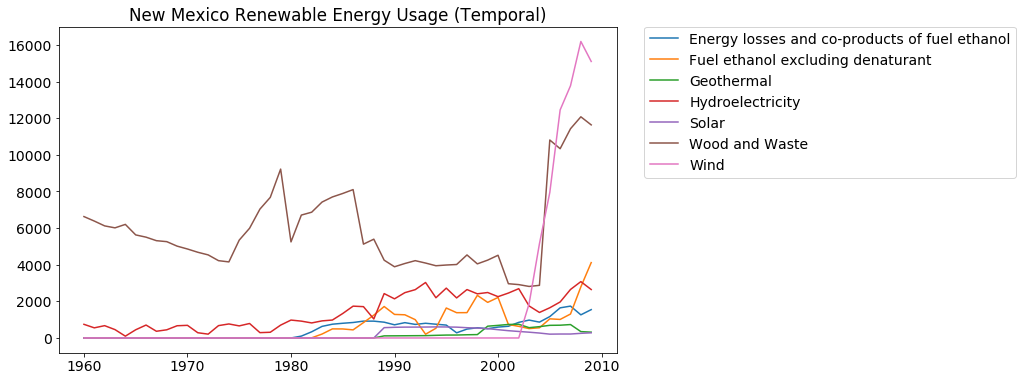

In [630]:
yrs = range(1960, 2010)
emlcb = [0] * 50
emtcb = [0] * 50
getcb = [0] * 50
hytcb = [0] * 50
sotcb = [0] * 50
wwtcb = [0] * 50
wytcb = [0] * 50
for _idx, record in energy_data.iterrows():
    if record['StateCode'] == 'NM':
        if record['MSN'] == 'EMLCB':
            emlcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'EMTCB':
            emtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'GETCB':
            getcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'HYTCB':
            hytcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'SOTCB':
            sotcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WWTCB':
            wwtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WYTCB':
            wytcb[record['Year'] - 1960] = record['Data']
plt.figure(figsize=(10, 6))
plt.plot(yrs, emlcb, label='Energy losses and co-products of fuel ethanol')
plt.plot(yrs, emtcb, label='Fuel ethanol excluding denaturant')
plt.plot(yrs, getcb, label='Geothermal')
plt.plot(yrs, hytcb, label='Hydroelectricity')
plt.plot(yrs, sotcb, label='Solar')
plt.plot(yrs, wwtcb, label='Wood and Waste')
plt.plot(yrs, wytcb, label='Wind')
plt.title('New Mexico Renewable Energy Usage (Temporal)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

[0.0, 0.0, 0.0, 745.4528, 0.0, 6627.60303, 0.0]


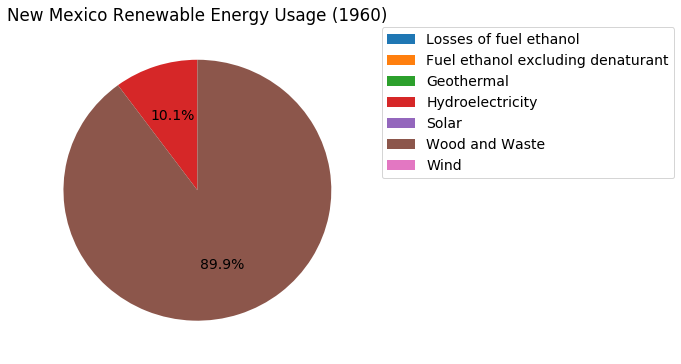

In [632]:
yr = 1960 - 1960
res = [emlcb[yr], emtcb[yr], getcb[yr], hytcb[yr], sotcb[yr], wwtcb[yr], wytcb[yr]]
print(res)
plt.figure(figsize=(6, 6))
plt.pie(res, autopct=lambda pct: ('%3.1f%%' % pct) if pct > 10 else '', labels=None, labeldistance=1.1, shadow=False, startangle=90)
plt.title('New Mexico Renewable Energy Usage (%d)' % (yr + 1960))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=['Losses of fuel ethanol', 'Fuel ethanol excluding denaturant', 'Geothermal', 'Hydroelectricity', 'Solar', 'Wood and Waste', 'Wind'])
plt.show()

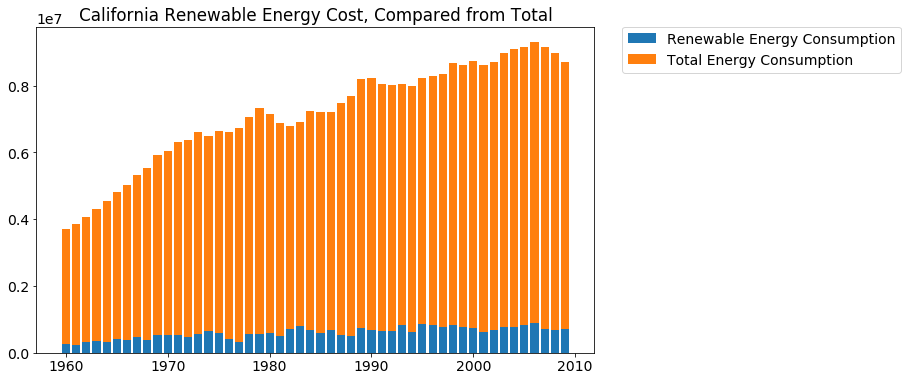

array([ 0.07826956,  0.0687303 ,  0.08830775,  0.09164112,  0.07845563,
        0.09524473,  0.08069594,  0.09748958,  0.07746745,  0.10144405,
        0.09464962,  0.09260044,  0.0801645 ,  0.09114492,  0.11046942,
        0.09557571,  0.06815676,  0.05295957,  0.08874045,  0.08283609,
        0.09005772,  0.07912462,  0.11520625,  0.13267928,  0.10625813,
        0.08976435,  0.10231375,  0.0752802 ,  0.07192662,  0.09965947,
        0.08916352,  0.08907752,  0.08718269,  0.11394982,  0.08645683,
        0.11589464,  0.11042156,  0.10125499,  0.10693589,  0.09765327,
        0.09297307,  0.0769659 ,  0.08521429,  0.09442414,  0.0923041 ,
        0.09831686,  0.10674702,  0.08364473,  0.08165059,  0.08902668])

In [430]:
draw_renewable_ratio_bar('CA', 'California Renewable Energy Cost, Compared from Total')

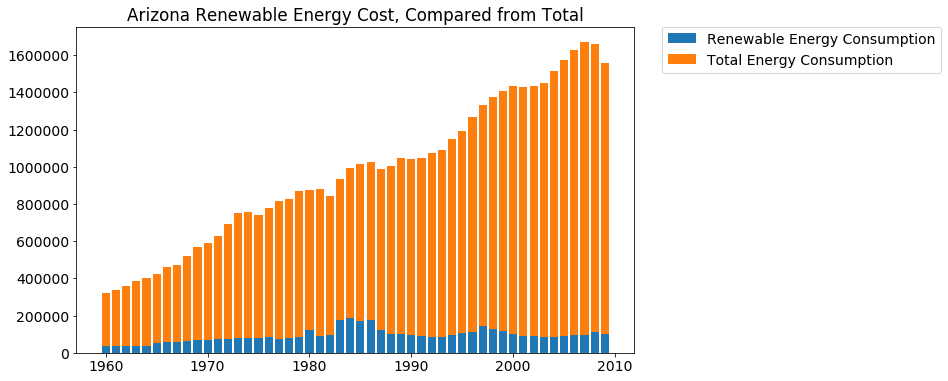

array([ 0.12779154,  0.11503654,  0.10622867,  0.10003772,  0.09266275,
        0.13344856,  0.14385758,  0.13612   ,  0.13911345,  0.13617617,
        0.13244295,  0.13377872,  0.12198053,  0.11841882,  0.12133945,
        0.12257272,  0.1220287 ,  0.10242824,  0.10678634,  0.10607156,
        0.159063  ,  0.11751988,  0.12724201,  0.23224703,  0.23530871,
        0.20367727,  0.20532073,  0.14221885,  0.10895754,  0.10768212,
        0.09994031,  0.09274844,  0.08903655,  0.0867604 ,  0.08939323,
        0.09782238,  0.09917555,  0.12097481,  0.10308043,  0.09040779,
        0.0769634 ,  0.0694    ,  0.06546815,  0.06245167,  0.05782867,
        0.06254423,  0.06277688,  0.06241305,  0.07259815,  0.07116298])

In [431]:
draw_renewable_ratio_bar('AZ', 'Arizona Renewable Energy Cost, Compared from Total')

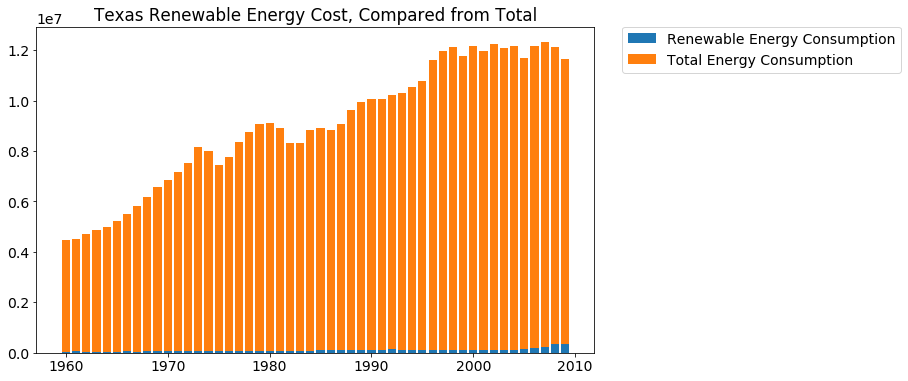

array([ 0.01131627,  0.01165292,  0.0102439 ,  0.00883157,  0.00886648,
        0.00949351,  0.00950659,  0.00867933,  0.01026479,  0.00986943,
        0.00925542,  0.00851059,  0.00904297,  0.00967595,  0.00968135,
        0.01030146,  0.00989557,  0.0099965 ,  0.00969217,  0.01000217,
        0.0072923 ,  0.00797775,  0.00978369,  0.00948974,  0.01012377,
        0.01091952,  0.0129831 ,  0.0134891 ,  0.01174258,  0.01301297,
        0.01181153,  0.0123153 ,  0.01351064,  0.01157829,  0.01105456,
        0.01148392,  0.00976501,  0.01067392,  0.00961192,  0.0084717 ,
        0.00844234,  0.00859109,  0.01019565,  0.00984244,  0.0102197 ,
        0.01203683,  0.01587445,  0.02037853,  0.02945305,  0.03156784])

In [432]:
draw_renewable_ratio_bar('TX', 'Texas Renewable Energy Cost, Compared from Total')

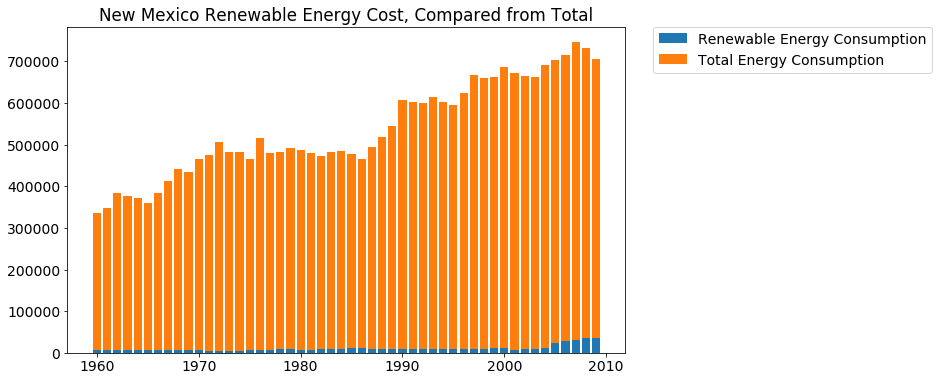

array([ 0.02240912,  0.02035951,  0.01802993,  0.01743338,  0.01718754,
        0.01716858,  0.01649076,  0.01392503,  0.01307498,  0.01323765,
        0.01209235,  0.01057224,  0.00945624,  0.0102444 ,  0.01031977,
        0.01306071,  0.01332105,  0.01547664,  0.01680621,  0.02063572,
        0.01294074,  0.01635002,  0.01727353,  0.01946835,  0.02088169,
        0.02258125,  0.02444174,  0.01768687,  0.01682712,  0.0185356 ,
        0.0145628 ,  0.01577767,  0.01578853,  0.01461585,  0.01372737,
        0.01675158,  0.01396921,  0.01490452,  0.01549557,  0.01585665,
        0.0158384 ,  0.01193049,  0.01250291,  0.01346022,  0.0172236 ,
        0.03453674,  0.04128455,  0.04457511,  0.05171203,  0.05317964])

In [433]:
draw_renewable_ratio_bar('NM', 'New Mexico Renewable Energy Cost, Compared from Total')

In [259]:
def draw_energy_polytrend(state, msn, exp):
    yrs = []
    data = []
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state and record['MSN'] == msn:
            yrs.append(record['Year'])
            data.append(record['Data'])
    z1 = np.polyfit(yrs, data, exp)
    p1 = np.poly1d(z1)
    plt.plot(yrs, p1(yrs))
    plt.show()
    return len(yrs)

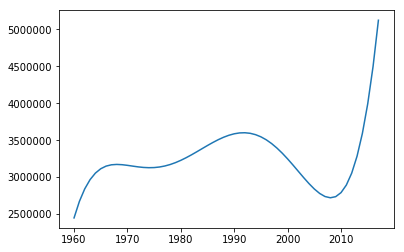

50

In [260]:
draw_energy_polytrend('CA', 'TEPRB', 5)

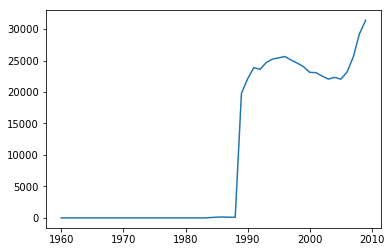

50

In [294]:
draw_energy_trend('CA', 'SOTCB')

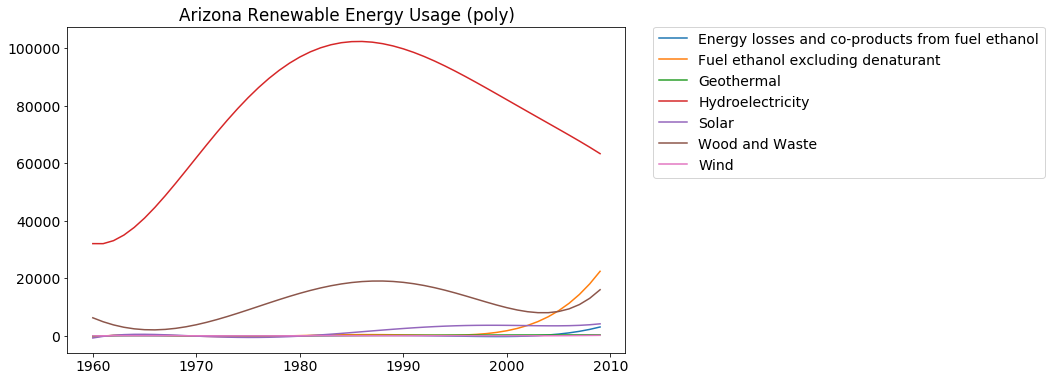

In [657]:
yrs = range(1960, 2010)
expo = 5
emlcb = [0] * 50
emtcb = [0] * 50
getcb = [0] * 50
hytcb = [0] * 50
sotcb = [0] * 50
wwtcb = [0] * 50
wytcb = [0] * 50
for _idx, record in energy_data.iterrows():
    if record['StateCode'] == 'AZ':
        if record['MSN'] == 'EMLCB':
            emlcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'EMTCB':
            emtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'GETCB':
            getcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'HYTCB':
            hytcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'SOTCB':
            sotcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WWTCB':
            wwtcb[record['Year'] - 1960] = record['Data']
        elif record['MSN'] == 'WYTCB':
            wytcb[record['Year'] - 1960] = record['Data']
emlcb_poly = np.poly1d(np.polyfit(yrs, emlcb, expo))
emtcb_poly = np.poly1d(np.polyfit(yrs, emtcb, expo))
getcb_poly = np.poly1d(np.polyfit(yrs, getcb, expo))
hytcb_poly = np.poly1d(np.polyfit(yrs, hytcb, expo))
sotcb_poly = np.poly1d(np.polyfit(yrs, sotcb, expo))
wwtcb_poly = np.poly1d(np.polyfit(yrs, wwtcb, expo))
wytcb_poly = np.poly1d(np.polyfit(yrs, wytcb, expo))
plt.figure(figsize=(10, 6))
plt.plot(yrs, emlcb_poly(yrs), label='Energy losses and co-products from fuel ethanol')
plt.plot(yrs, emtcb_poly(yrs), label='Fuel ethanol excluding denaturant')
plt.plot(yrs, getcb_poly(yrs), label='Geothermal')
plt.plot(yrs, hytcb_poly(yrs), label='Hydroelectricity')
plt.plot(yrs, sotcb_poly(yrs), label='Solar')
plt.plot(yrs, wwtcb_poly(yrs), label='Wood and Waste')
plt.plot(yrs, wytcb_poly(yrs), label='Wind')
plt.title('Arizona Renewable Energy Usage (poly)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [402]:
def state_data_dict(state):
    data_dict = {}
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state:
            if record['MSN'] not in data_dict:
                data_dict[record['MSN']] = [0] * 50
            data_dict[record['MSN']][record['Year'] - 1960] = record['Data']
    return data_dict

In [452]:
def renewable_energy_price(state):
    data_dict = state_data_dict(state)
    res = []
    for i in range(0, 50):
        if data_dict['ELISB'][i] > 0:
            calc_not_renewable = data_dict['CLTCV'][i] \
                    + data_dict['NNTCB'][i] * (data_dict['NGTCD'][i] * 1000) \
                    + data_dict['PATCV'][i] - data_dict['EMTCV'][i] \
                    + data_dict['NUETV'][i] \
                    + data_dict['ELIMV'][i] - data_dict['ELEXV'][i] \
                    + data_dict['ELISB'][i] * (data_dict['ELIMD'][i] * 1000)
        else:
            calc_not_renewable = data_dict['CLTCV'][i] \
                    + data_dict['NNTCB'][i] * (data_dict['NGTCD'][i] * 1000) \
                    + data_dict['PATCV'][i] - data_dict['EMTCV'][i] \
                    + data_dict['NUETV'][i] \
                    + data_dict['ELIMV'][i] - data_dict['ELEXV'][i] \
                    - (data_dict['ELISB'][i]) * (data_dict['ELEXD'][i] * 1000)
        tetcv = data_dict['TETCV'][i]
        million_nrenew = calc_not_renewable / 1000 / 1000
        res.append(((tetcv - million_nrenew) / data_dict['RETCB'][i]) * 1000)
        
    return res

renewable_energy_price('AZ')

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.177997279714843,
 9.296790284176984,
 10.69177251229765,
 12.462367228498156,
 15.808691936634208,
 19.371299878344917,
 20.510316946998657,
 26.347120113433792,
 27.70533991472206,
 32.04611653887604,
 27.319525335342107,
 38.269879839109656,
 37.08376703730046,
 19.397518228029114,
 18.888824516709978,
 27.84012374527494,
 20.99724079008703,
 33.2153124203678,
 38.11514083202258,
 47.81025236555706,
 44.38542446605835,
 42.06479931661179,
 44.36194211571787,
 61.78282472350335,
 50.31964760443766,
 52.0578460835038,
 52.70592860910407,
 44.79873095092971,
 59.4160703266105,
 70.41783499572334,
 91.73995003284828,
 98.69358334567868,
 81.99242396159721,
 92.21196652243074,
 100.4653583722774,
 111.28135327900553,
 138.90978254217475,
 136.75790350299349,
 123.39053601006208,
 120.19344220133165]

# Neural Network

In [473]:
def min_max_scale(arr):
    scaler = preprocessing.MinMaxScaler()
    return scaler.fit_transform(np.array(arr).reshape(-1, 1)).reshape(-1)

In [288]:
def track_trend(state, msn):
    yrs = []
    data = []
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state and record['MSN'] == msn:
            yrs.append(record['Year'])
            data.append(record['Data'])
    res = []
    for i in range(1, len(yrs)):
        if data[i - 1] != 0:
            res.append(data[i] / data[i - 1])
    return res
#     return [(0 if data[i - 1] == 0 else data[i] / data[i - 1]) for i in range(1, len(yrs))]

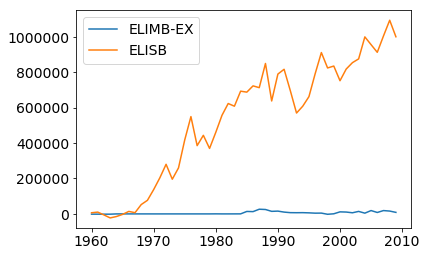

In [419]:
yrs = []
data1 = []
data2 = []
data3 = []
for _idx, record in energy_data.iterrows():
    if record['StateCode'] == 'CA' and record['MSN'] == 'ELIMB':
        yrs.append(record['Year'])
        data1.append(record['Data'])
    elif record['StateCode'] == 'CA' and record['MSN'] == 'ELEXB':
        data2.append(record['Data'])
    elif record['StateCode'] == 'CA' and record['MSN'] == 'ELISB':
        data3.append(record['Data'])
plt.plot(yrs, np.array(data1) - np.array(data2), label='ELIMB-EX')
plt.plot(yrs, data3, label='ELISB')
plt.legend()
plt.show()

In [279]:
res_arr = track_trend('CA', 'RETCB')
min(res_arr), max(res_arr), np.mean(res_arr)

(0.7308464717436405, 1.705552963420681, 1.0377717222229761)

In [280]:
res_arr = track_trend('CA', 'REPRB')
min(res_arr), max(res_arr), np.mean(res_arr)

(0.7308464717436405, 1.705552963420681, 1.0354581803066942)

In [267]:
res_arr = track_trend('CA', 'TETCB')
min(res_arr), max(res_arr), np.mean(res_arr)

(0.9583851453338988, 1.075428119734608, 1.0177279587882497)

In [308]:
res_arr = track_trend('CA', 'GETCB')
res_arr, min(res_arr), max(res_arr), np.mean(res_arr)

([2.7888941133191745,
  1.0592756897332845,
  1.6597720344481615,
  1.2110659495870835,
  0.9276721124884656,
  0.9899087998378687,
  1.6853485280329281,
  1.3733581869618283,
  1.4170948649450057,
  0.8582026405784952,
  1.041383391386494,
  2.627226295243779,
  1.3543596533427702,
  1.2540733280670766,
  1.318981066691087,
  1.11051986123215,
  0.9964992371798371,
  0.8253036302028909,
  1.3050530876449884,
  1.308889496854885,
  1.1278638815630189,
  0.8517744212611889,
  1.262363439005619,
  1.2548174601105588,
  1.1980676973466422,
  1.1001348524505836,
  1.0447364056486825,
  0.9451470312282533,
  1.3763976511610674,
  1.05910167850393,
  1.0222256070958098,
  0.9910451818332988,
  1.0094115189845088,
  0.9167869318203674,
  0.8416767059772327,
  1.0801402999265963,
  1.0195340995346176,
  1.0092659350159678,
  1.0141507338483922,
  0.9429152996433136,
  1.0037429410293648,
  1.0557754878658996,
  0.9970084436379529,
  0.9889519814191401,
  0.9928631527252035,
  0.976907731866176

In [585]:
# pr_input = kr.layers.Input(shape=(10,), dtype='int32')
# pr_2vec = kr.layers.Embedding(input_length=10, output_dim=16, input_dim=1)(pr_input)
# pr_lstm = kr.layers.LSTM(10)(pr_2vec)
# pr_softmax_re_prod = kr.layers.Dense(381, activation='softmax', name='re_prod_output')(pr_lstm) # 1%, (0.73, 1.71)
# # pr_softmax_re_cons = kr.layers.Dense(100, activation='softmax', name='re_cons_output')(pr_lstm) # 1%, (0.7, 1.7)
# pr_softmax_tt_cons = kr.layers.Dense(381, activation='softmax', name='tt_cons_output')(pr_lstm) # 1%, (0.96, 1.08)
# pr_softmax_emlcb = kr.layers.Dense(381, activation='softmax', name='emlcb_output')(pr_lstm) # 1%, (0.40, 2.55)
# pr_softmax_emtcb = kr.layers.Dense(381, activation='softmax', name='emtcb_output')(pr_lstm) # 5%, (0.1, 5.6)
# pr_softmax_getcb = kr.layers.Dense(381, activation='softmax', name='getcb_output')(pr_lstm) # 2%, (0.8, 2.8)
# pr_softmax_sotcb = kr.layers.Dense(381, activation='softmax', name='sotcb_output')(pr_lstm) # 5%, (0.7, 2.0)
# pr_softmax_wwtcb = kr.layers.Dense(381, activation='softmax', name='wwtcb_output')(pr_lstm) # 1%, (0.68, 1.4)
# pr_softmax_wytcb = kr.layers.Dense(381, activation='softmax', name='wytcb_output')(pr_lstm) # 2%, (0.1, 2.3)
# pr_out = kr.layers.Dense(10, activation='sigmoid')(pr_lstm)

optimizer_adam = kr.optimizers.Adam(lr=1e-03)
pr_model = kr.models.Sequential()
# pr_model.add(kr.layers.Embedding(2, 16, input_length=10))
# pr_model.add(kr.layers.Dense(32, activation='relu'))
pr_model.add(kr.layers.LSTM(64, input_shape=(1, 10)))
pr_model.add(kr.layers.Dense(64))
pr_model.add(kr.layers.Dense(16))
pr_model.add(kr.layers.Dropout(0.4))
pr_model.add(kr.layers.Dense(10))
# pr_model = kr.models.Model(inputs=[pr_input], outputs=[pr_softmax_re_prod, pr_softmax_tt_cons, pr_softmax_emlcb, pr_softmax_emtcb, pr_softmax_getcb, pr_softmax_sotcb, pr_softmax_wwtcb, pr_softmax_wytcb])
pr_model.compile(optimizer=optimizer_adam, loss='mse', metrics=['accuracy'])

In [590]:
def generate_data2(state):
    last = []
    now = []
    emlcb = [0] * 50
    emtcb = [0] * 50
    getcb = [0] * 50
    hytcb = [0] * 50
    sotcb = [0] * 50
    wwtcb = [0] * 50
    wytcb = [0] * 50
    retcb = [0] * 50
    reprb = [0] * 50
    tetcb = [0] * 50
    emlcb_l = [0] * 49
    emtcb_l = [0] * 49
    getcb_l = [0] * 49
    hytcb_l = [0] * 49
    sotcb_l = [0] * 49
    wwtcb_l = [0] * 49
    wytcb_l = [0] * 49
    retcb_l = [0] * 49
    reprb_l = [0] * 49
    tetcb_l = [0] * 49
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state:
            if record['MSN'] == 'EMLCB':
                emlcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'EMTCB':
                emtcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'GETCB':
                getcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'HYTCB':
                hytcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'SOTCB':
                sotcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'WWTCB':
                wwtcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'WYTCB':
                wytcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'RETCB':
                retcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'REPRB':
                reprb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'TETCB':
                tetcb[record['Year'] - 1960] = record['Data']
    for i in range(1, 50):
        emlcb_l[i - 1] = emlcb[i] - emlcb[i - 1]
        emtcb_l[i - 1] = emtcb[i] - emtcb[i - 1]
        getcb_l[i - 1] = getcb[i] - getcb[i - 1]
        hytcb_l[i - 1] = hytcb[i] - hytcb[i - 1]
        sotcb_l[i - 1] = sotcb[i] - sotcb[i - 1]
        wwtcb_l[i - 1] = wwtcb[i] - wwtcb[i - 1]
        wytcb_l[i - 1] = wytcb[i] - wytcb[i - 1]
        retcb_l[i - 1] = retcb[i] - retcb[i - 1]
        reprb_l[i - 1] = reprb[i] - reprb[i - 1]
        tetcb_l[i - 1] = tetcb[i] - tetcb[i - 1]
    emlcb_r = min_max_scale(emlcb_l)
    emtcb_r = min_max_scale(emtcb_l)
    getcb_r = min_max_scale(getcb_l)
    hytcb_r = min_max_scale(hytcb_l)
    sotcb_r = min_max_scale(sotcb_l)
    wwtcb_r = min_max_scale(wwtcb_l)
    wytcb_r = min_max_scale(wytcb_l)
    retcb_r = min_max_scale(retcb_l)
    reprb_r = min_max_scale(reprb_l)
    tetcb_r = min_max_scale(tetcb_l)
#     emlcb = min_max_scale(emlcb)[:49]
#     emtcb = min_max_scale(emtcb)[:49]
#     getcb = min_max_scale(getcb)[:49]
#     hytcb = min_max_scale(hytcb)[:49]
#     sotcb = min_max_scale(sotcb)[:49]
#     wwtcb = min_max_scale(wwtcb)[:49]
#     wytcb = min_max_scale(wytcb)[:49]
#     retcb = min_max_scale(retcb)[:49]
#     reprb = min_max_scale(reprb)[:49]
#     tetcb = min_max_scale(tetcb)[:49]
    
    # (30, 20, 10)
    # (30, 1, 10)
#     res = []
#     for i in range(30):
#         res.append(np.transpose([emlcb[i:], emtcb, getcb, hytcb, sotcb, wwtcb, wytcb, retcb, reprb, tetcb]))
    return np.transpose([emlcb[:49], emtcb[:49], getcb[:49], hytcb[:49], sotcb[:49], wwtcb[:49], wytcb[:49], retcb[:49], reprb[:49], tetcb[:49]]).reshape(49, 1, 10), \
            np.transpose([emlcb_r, emtcb_r, getcb_r, hytcb_r, sotcb_r, wwtcb_r, wytcb_r, retcb_r, reprb_r, tetcb_r])
#             np.transpose([emlcb_l, emtcb_l, getcb_l, hytcb_l, sotcb_l, wwtcb_l, wytcb_l, retcb_l, reprb_l, tetcb_l])
            
    
#     while True:
#         for j in range(49):
#             i = j + 1
#             yield np.array([[emlcb[i], emtcb[i], getcb[i], hytcb[i], sotcb[i], wwtcb[i], wytcb[i], retcb[i], reprb[i], tetcb[i]]]).reshape([1, 1, 10]), \
#                 np.array([[emlcb_r[j], emtcb_r[j], getcb_r[j], hytcb_r[j], sotcb_r[j], wwtcb_r[j], wytcb_r[j], retcb_r[j], reprb_r[j], tetcb_r[j]]])

In [591]:
X, y = generate_data2('CA')
pr_model.fit(X, y, epochs=2, validation_split=0.33)

Train on 32 samples, validate on 17 samples
Epoch 1/2
32/32 [==============================] - 0s - loss: 4116.9561 - acc: 0.5312 - val_loss: 3290.5762 - val_acc: 0.2941
Epoch 2/2
32/32 [==============================] - 0s - loss: 4174.2461 - acc: 0.5312 - val_loss: 3448.9866 - val_acc: 0.2941


In [535]:
def data_directory(state):
    last = []
    now = []
    emlcb = [0] * 50
    emtcb = [0] * 50
    getcb = [0] * 50
    hytcb = [0] * 50
    sotcb = [0] * 50
    wwtcb = [0] * 50
    wytcb = [0] * 50
    retcb = [0] * 50
    reprb = [0] * 50
    tetcb = [0] * 50
    emlcb_l = [0] * 49
    emtcb_l = [0] * 49
    getcb_l = [0] * 49
    hytcb_l = [0] * 49
    sotcb_l = [0] * 49
    wwtcb_l = [0] * 49
    wytcb_l = [0] * 49
    retcb_l = [0] * 49
    reprb_l = [0] * 49
    tetcb_l = [0] * 49
    for _idx, record in energy_data.iterrows():
        if record['StateCode'] == state:
            if record['MSN'] == 'EMLCB':
                emlcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'EMTCB':
                emtcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'GETCB':
                getcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'HYTCB':
                hytcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'SOTCB':
                sotcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'WWTCB':
                wwtcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'WYTCB':
                wytcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'RETCB':
                retcb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'REPRB':
                reprb[record['Year'] - 1960] = record['Data']
            elif record['MSN'] == 'TETCB':
                tetcb[record['Year'] - 1960] = record['Data']
    for i in range(1, 50):
        emlcb_l[i - 1] = emlcb[i] - emlcb[i - 1]
        emtcb_l[i - 1] = emtcb[i] - emtcb[i - 1]
        getcb_l[i - 1] = getcb[i] - getcb[i - 1]
        hytcb_l[i - 1] = hytcb[i] - hytcb[i - 1]
        sotcb_l[i - 1] = sotcb[i] - sotcb[i - 1]
        wwtcb_l[i - 1] = wwtcb[i] - wwtcb[i - 1]
        wytcb_l[i - 1] = wytcb[i] - wytcb[i - 1]
        retcb_l[i - 1] = retcb[i] - retcb[i - 1]
        reprb_l[i - 1] = reprb[i] - reprb[i - 1]
        tetcb_l[i - 1] = tetcb[i] - tetcb[i - 1]
    emlcb_r = min_max_scale(emlcb_l)
    emtcb_r = min_max_scale(emtcb_l)
    getcb_r = min_max_scale(getcb_l)
    hytcb_r = min_max_scale(hytcb_l)
    sotcb_r = min_max_scale(sotcb_l)
    wwtcb_r = min_max_scale(wwtcb_l)
    wytcb_r = min_max_scale(wytcb_l)
    retcb_r = min_max_scale(retcb_l)
    reprb_r = min_max_scale(reprb_l)
    tetcb_r = min_max_scale(tetcb_l)
    emlcb0 = min_max_scale(emlcb)[:49]
    emtcb0 = min_max_scale(emtcb)[:49]
    getcb0 = min_max_scale(getcb)[:49]
    hytcb0 = min_max_scale(hytcb)[:49]
    sotcb0 = min_max_scale(sotcb)[:49]
    wwtcb0 = min_max_scale(wwtcb)[:49]
    wytcb0 = min_max_scale(wytcb)[:49]
    retcb0 = min_max_scale(retcb)[:49]
    reprb0 = min_max_scale(reprb)[:49]
    tetcb0 = min_max_scale(tetcb)[:49]
    
    return [emlcb, emtcb, getcb, hytcb, sotcb, wwtcb, wytcb, retcb, reprb, tetcb], \
            [emlcb0, emtcb0, getcb0, hytcb0, sotcb0, wwtcb0, wytcb0, retcb0, reprb0, tetcb0]

In [560]:
1960+91

2051

In [605]:
gdp_data = pd.read_csv('../Data/gdp.csv')
gdp_data.head()

,Fips,Area,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,United States,8542530,9024434,9595951,10219801,10556006,10910833,11440109,12200160,...,14391149,14626598,14320114,14859772,15406002,16041243,16576738,17312381,18007085,18511499
1,1000,Alabama,104218,109414,115015,119020,122822,127873,134388,146989,...,169923,172646,168315,174710,180665,185878,190319,193995,200421,205625
2,2000,Alaska,25446,24030,24684,26853,28553,29763,32039,35195,...,49197,55461,50463,54134,58759,60890,59808,58196,53311,50404
3,4000,Arizona,132708,143768,156145,165912,172288,179605,192685,204136,...,262045,256718,242509,245668,254192,264693,270469,281031,292972,305849
4,5000,Arkansas,60417,62275,66715,68809,70849,74097,78774,85261,...,97384,99838,98020,102951,107287,109226,114456,118068,119320,121383


In [609]:
gdp_data.set_index('Area', inplace=True)

In [610]:
gdp_data.T.head()

Area,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
1997,8542530,104218,25446,132708,60417,1081444,135868,140108,33672,51566,...,155353,14719,491139,1621473,1395911,565218,1833459,879623,256351,1499356
1998,9024434,109414,24030,143768,62275,1151119,150555,147911,37298,53802,...,163831,14946,516974,1697867,1468774,591961,1953002,924162,278741,1592954
1999,9595951,115015,24684,156145,66715,1248006,164835,154708,41341,57728,...,173620,15771,545690,1798680,1548571,618099,2084017,977425,301633,1721837
2000,10219801,119020,26853,165912,68809,1362995,181488,169004,44851,60059,...,182408,17349,594286,1902632,1626287,659586,2190866,1053702,329177,1863264
2001,10556006,122822,28553,172288,70849,1376163,188108,175290,47762,64888,...,189229,18831,613936,1997404,1648468,676070,2291170,1102628,341110,1885219


In [636]:
acb = [gdp_data.T['New Mexico'][2009 - 1997], gdp_data.T['Arizona'][2009 - 1997], gdp_data.T['Texas'][2009 - 1997], gdp_data.T['California'][2009 - 1997]]

In [637]:
acb

[82838, 242509, 1166516, 1912115]

In [640]:
# 2009 年的 retcb
retcb_ca = 0
retcb_az = 0
retcb_nm = 0
retcb_tx = 0
for _idx, record in energy_data.iterrows():
    if record['MSN'] == 'RETCB' and record['Year'] == 2009:
        if record['StateCode'] == 'CA':
            retcb_ca = record['Data']
        elif record['StateCode'] == 'AZ':
            retcb_az = record['Data']
        elif record['StateCode'] == 'NM':
            retcb_nm = record['Data']
        elif record['StateCode'] == 'TX':
            retcb_tx = record['Data']
acd = [retcb_nm, retcb_az, retcb_tx, retcb_ca]

In [641]:
acd

[35635.38371, 103493.2854, 356634.8206, 712704.4602]

In [643]:
np.array(acb) - np.mean(acb)

array([ -768156.5,  -608485.5,   315521.5,  1061120.5])

In [644]:
def cov(s1, s2):
    cc = np.mean(np.dot(np.array(s1) - np.mean(s1), np.array(s2) - np.mean(s2)))
    cb = np.std(s1) * np.std(s2)
    return cc / cb

In [649]:
stats.pearsonr(acb, acd)

(0.99146756553962478, 0.0085324344603752173)

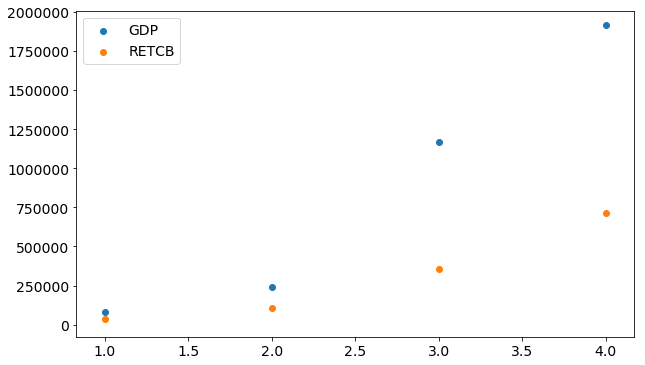

In [653]:
ip = [1, 2, 3, 4]
plt.figure(figsize=(10,6))
plt.scatter(ip, acb, label='GDP')
plt.scatter(ip, acd, label='RETCB')
plt.legend()
plt.show()